# Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Specialization Capstone by IBM/Coursera

### Date: 3 March 2021

### Author: Daryna Manzheliivska

***

## Business Problem to be solved:

###  To find the safest borough in London to establish a Pizza restaurant with extra-fast neighbourhood delivery (i.e. up to 20 min) and without competition

In this data science project we will choose a suitable neighbourhood in London to establish a Pizza restaurant. Our client wants to start a small restaurant business focused on extra-fast pizza delivery around a small local neighbourhood. Therefore our client has requested that location should be the sweet spot area of the safest neighborhood with enough population where there are little to no local Pizza restaurants to avoid competition.

Therefore, we will build our data science project into four stages of preparing and analysing data to provide a data science advice for our client:

1. Crime level
2. Population
3. Combined crime to population ratio
4. Exploring venues in identified borough

## Data

• To identify the safest areas neighborhood we will use London crime data, which we downloaded from https://data.london.gov.uk/dataset/recorded_crime_summary.<br><br>

• We will get data with London boroughts population, latitude and longitude from wikipedia page: https://en.wikipedia.org/wiki/List_of_London_boroughs<br><br>

• All data related to locations of Pizza restaurants will be obtained via the FourSquare API utilized via the Request library in Python. This API provides location search, location sharing and details about a local businesses. Foursquare users can also use photos, tips and reviews in many productive ways to add value to the results of data science projects.<br><br>

• Work Flow:
HTTP requests would be made to this Foursquare API server using latitude and longitude of London boroughts to collect the information of the nearby venues of the chosen boroughs.<br><br>

• Visualization:
To visualize the neighborhoods cluster distribution of chosen London boroughs we will use Folium - Python visualization library that creates an interactive  map.<br><br>

• Extensive comparative analysis to derive insights from the datasets so that to define the safest neighborhood will be carried out using python’s scientific libraries Pandas, NumPy and Scikit-learn.


## Python Libraries used:

• Pandas - Library for Data Analysis<br>
• NumPy – Library to handle data in a vectorized manner<br>
• JSON – Library to handle JSON files<br>
• Geopy – Library to retrieve Location Data<br>
• Requests – Library to handle http requests<br>
• Folium – Map rendering Library<br>
• Sklearn – Python machine learning Library<br>
• Matplotlib – Python Plotting Module<br>

## Methodology

• Data will be collected from provided above public internet resources, cleaned and processed into a dataframe.<br>

• FourSquare data will be used to locate all venues and then filtered by venue category.<br>

• Final data science advice will be provided based on combined analysis of datasets and venue data.

# Part 1 of the data analysis

### Lets import libraries

In [4]:
# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle data in a vectorized manner
import numpy as np 
from bs4 import BeautifulSoup

# library to handle JSON files
import json
# tranform JSON file into a pandas dataframe
from pandas import json_normalize  

# module to convert an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# library to handle requests
import requests

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: ...working... done

# All requested packages already installed.



***

# Lets analyze London recorded crime

### We will scrape London crime records by boroughs in the last 2 years from London Datastore
url: https://data.london.gov.uk/dataset/recorded_crime_summary

In [5]:
lc = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
lc.head()

,MajorText,MinorText,LookUp_BoroughName,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2,4,4,6,2,7,4,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,138,130,140,113,134,118,109,109,97,122,97,103,107,80,86,121,122,114,116,120,100,107,100
2,Burglary,Burglary - Business and Community,Barking and Dagenham,29,27,21,27,31,35,37,30,30,26,31,17,28,29,16,16,28,24,32,21,18,24,20
3,Burglary,Burglary - Residential,Barking and Dagenham,99,96,114,96,71,67,80,97,114,130,116,123,97,57,42,63,72,63,54,68,90,91,69
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,5,9,6,11,8,7,9,13,3,16,6,6,16,15,11,21,9,12,14,17,15,9


In [6]:
lc.shape

(1546, 26)

Let's rename LookUp_BoroughName to Borough

In [7]:
lc.rename(columns={lc.columns[2]:'Borough'}, inplace=True)
lc.head()

,MajorText,MinorText,Borough,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2,4,4,6,2,7,4,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,138,130,140,113,134,118,109,109,97,122,97,103,107,80,86,121,122,114,116,120,100,107,100
2,Burglary,Burglary - Business and Community,Barking and Dagenham,29,27,21,27,31,35,37,30,30,26,31,17,28,29,16,16,28,24,32,21,18,24,20
3,Burglary,Burglary - Residential,Barking and Dagenham,99,96,114,96,71,67,80,97,114,130,116,123,97,57,42,63,72,63,54,68,90,91,69
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,5,9,6,11,8,7,9,13,3,16,6,6,16,15,11,21,9,12,14,17,15,9


In [8]:
lc['Total crimes'] = lc.iloc[:,3:27].sum(axis=1)
crimesum = lc['Total crimes']
lc.drop(labels=['Total crimes'], axis=1,inplace = True)
lc.insert(3, 'Total crimes', crimesum)
lc.head()

,MajorText,MinorText,Borough,Total crimes,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
0,Arson and Criminal Damage,Arson,Barking and Dagenham,113,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2,4,4,6,2,7,4,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2583,138,130,140,113,134,118,109,109,97,122,97,103,107,80,86,121,122,114,116,120,100,107,100
2,Burglary,Burglary - Business and Community,Barking and Dagenham,597,29,27,21,27,31,35,37,30,30,26,31,17,28,29,16,16,28,24,32,21,18,24,20
3,Burglary,Burglary - Residential,Barking and Dagenham,1969,99,96,114,96,71,67,80,97,114,130,116,123,97,57,42,63,72,63,54,68,90,91,69
4,Drug Offences,Drug Trafficking,Barking and Dagenham,244,6,5,9,6,11,8,7,9,13,3,16,6,6,16,15,11,21,9,12,14,17,15,9


In [9]:
# removing unnecessary columns
lc.drop(lc.columns[0:2], axis=1, inplace=True)
lc.drop(lc.columns[2:26], axis=1, inplace=True)
lc.head()

,Borough,Total crimes
0,Barking and Dagenham,113
1,Barking and Dagenham,2583
2,Barking and Dagenham,597
3,Barking and Dagenham,1969
4,Barking and Dagenham,244


In [10]:
# calculating total crime incidents for the past 24 months by boroughs
lc = lc.groupby(['Borough'], as_index=False).sum()
lc.head()

,Borough,Total crimes
0,Barking and Dagenham,37630
1,Barnet,55803
2,Bexley,31822
3,Brent,56196
4,Bromley,44735


In [11]:
# let's find out average amount of crimes per months
# recall that we use a dataset for the past 24 months the sum into monthly average
lc['Total crimes'] = lc['Total crimes']/24
lc.rename(columns={lc.columns[1]:'Avg crimes per month'}, inplace=True)
lc.head()

,Borough,Avg crimes per month
0,Barking and Dagenham,1567.916667
1,Barnet,2325.125000
2,Bexley,1325.916667
3,Brent,2341.500000
4,Bromley,1863.958333


In [12]:
# Let's sourt out all boroughs with most incidents at the top
lcrime = lc.sort_values(by='Avg crimes per month')
lcrime

,Borough,Avg crimes per month
22,London Heathrow and London City Airports,197.500000
19,Kingston upon Thames,967.833333
26,Richmond upon Thames,996.041667
28,Sutton,1064.708333
23,Merton,1112.791667
13,Harrow,1313.083333
2,Bexley,1325.916667
14,Havering,1419.833333
0,Barking and Dagenham,1567.916667
11,Hammersmith and Fulham,1692.625000


Let's drop airports areas which is our row 22 and reset index

In [13]:
lcrime.drop([22], inplace=True)
lcrime.reset_index(drop=True, inplace=True)
lcrime

,Borough,Avg crimes per month
0,Kingston upon Thames,967.833333
1,Richmond upon Thames,996.041667
2,Sutton,1064.708333
3,Merton,1112.791667
4,Harrow,1313.083333
5,Bexley,1325.916667
6,Havering,1419.833333
7,Barking and Dagenham,1567.916667
8,Hammersmith and Fulham,1692.625000
9,Kensington and Chelsea,1693.500000


#### Using matplotlib lets visualize our crime data - from most safest to less safest London boroughs 

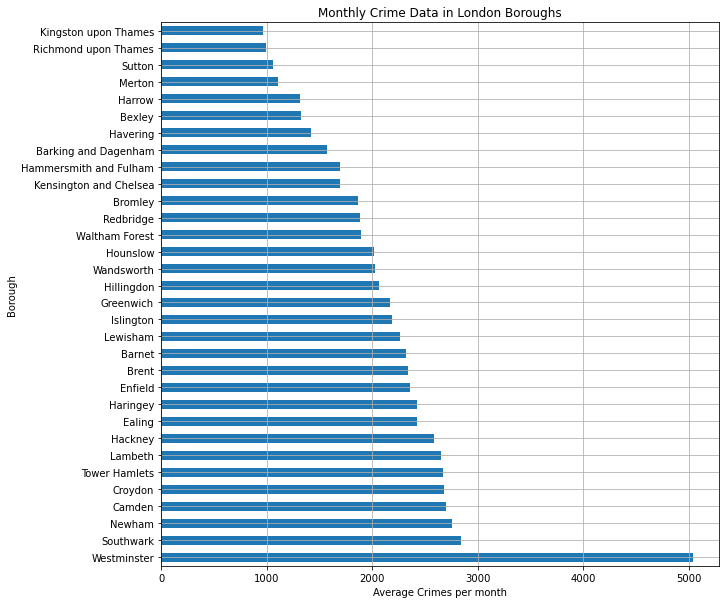

In [14]:
lcrime.set_index('Borough')['Avg crimes per month'].sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Average Crimes per month')
plt.title('Monthly Crime Data in London Boroughs')
plt.show()

# > End of the 1st part of the data preparation<

***

# Part 2 - Create a dataset of London boroughs with coordinates and population

We will scrape data on London boroughs from wikipedia page. 

url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [15]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
london_data=pd.read_html(url, header=0)[0]
london_data

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


Now let's drop columns we don't need and remove any notes from Borough column

In [16]:
lp = london_data.drop(['Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Nr. in map'], axis=1)
lp['Borough'].replace('Barking and Dagenham [note 1]','Barking and Dagenham', inplace=True)
lp['Borough'].replace('Greenwich [note 2]','Greenwich', inplace=True)
lp['Borough'].replace('Hammersmith and Fulham [note 4]','Hammersmith and Fulham', inplace=True)
lp.head()

,Borough,Population (2019 est)[1],Co-ordinates
0,Barking and Dagenham,212906,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


Let's rename Population column and edit a vierdly parsed coordinates for Barking and Dagenham

In [17]:
lp.rename(columns={lp.columns[1]:'2019 Population'}, inplace=True)
lp.loc[0, 'Co-ordinates'] = '51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E'
lp

,Borough,2019 Population,Co-ordinates
0,Barking and Dagenham,212906,51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E
1,Barnet,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


With Nominatim geocoding service we will further cleanse coordinates to separate longitude and latitude columns

In [18]:
geolocator = Nominatim(user_agent="London_explorer")
lp['Co-ordinates']= lp['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
lp[['Latitude', 'Longitude']] = lp['Co-ordinates'].apply(pd.Series)
lp

,Borough,2019 Population,Co-ordinates,Latitude,Longitude
0,Barking and Dagenham,212906,"(51.5541171, 0.15050434261994267)",51.554117,0.150504
1,Barnet,395896,"(51.65309, -0.2002261)",51.653090,-0.200226
2,Bexley,248287,"(39.9692378, -82.936864)",39.969238,-82.936864
3,Brent,329771,"(32.9373463, -87.1647184)",32.937346,-87.164718
4,Bromley,332336,"(51.4028046, 0.0148142)",51.402805,0.014814
5,Camden,270029,"(39.9448402, -75.1198911)",39.944840,-75.119891
6,Croydon,386710,"(51.3713049, -0.101957)",51.371305,-0.101957
7,Ealing,341806,"(51.5126553, -0.3051952)",51.512655,-0.305195
8,Enfield,333794,"(51.6520851, -0.0810175)",51.652085,-0.081018
9,Greenwich,287942,"(51.4820845, -0.0045417)",51.482084,-0.004542


And drop old Co-ordinates column which we now don't need

In [19]:
lpop = lp.drop(['Co-ordinates'], axis=1)
lpop

,Borough,2019 Population,Latitude,Longitude
0,Barking and Dagenham,212906,51.554117,0.150504
1,Barnet,395896,51.653090,-0.200226
2,Bexley,248287,39.969238,-82.936864
3,Brent,329771,32.937346,-87.164718
4,Bromley,332336,51.402805,0.014814
5,Camden,270029,39.944840,-75.119891
6,Croydon,386710,51.371305,-0.101957
7,Ealing,341806,51.512655,-0.305195
8,Enfield,333794,51.652085,-0.081018
9,Greenwich,287942,51.482084,-0.004542


Ok. From our dataset we understand that London Latitude is 51°N. Now Bexley, Brent, Camden and Sutton have incorrect coordinates. Let's manuale correct 4 rows using corresponding google data.

In [20]:
lpop.loc[2, 'Latitude'] = '51.4416'
lpop.loc[2, 'Longitude'] = '0.150488'
lpop.loc[3, 'Latitude'] = '51.5597'
lpop.loc[3, 'Longitude'] = '-0.2710'
lpop.loc[5, 'Latitude'] = '51.5363'
lpop.loc[5, 'Longitude'] = '-0.140556'
lpop.loc[27, 'Latitude'] = '51.3656'
lpop.loc[27, 'Longitude'] = '-0.1963'
lpop

,Borough,2019 Population,Latitude,Longitude
0,Barking and Dagenham,212906,51.5541,0.150504
1,Barnet,395896,51.6531,-0.200226
2,Bexley,248287,51.4416,0.150488
3,Brent,329771,51.5597,-0.2710
4,Bromley,332336,51.4028,0.0148142
5,Camden,270029,51.5363,-0.140556
6,Croydon,386710,51.3713,-0.101957
7,Ealing,341806,51.5127,-0.305195
8,Enfield,333794,51.6521,-0.0810175
9,Greenwich,287942,51.4821,-0.0045417


#### Using matplotlib lets visualize our population data - from top populated to less populated London boroughs 

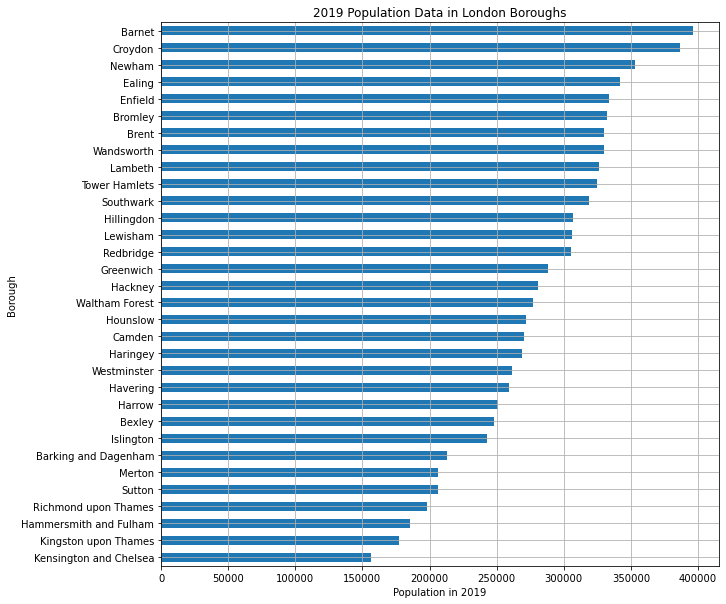

In [21]:
lpop.set_index('Borough')['2019 Population'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Population in 2019')
plt.title('2019 Population Data in London Boroughs')
plt.show()

### We now have two cleared datasets: 1) lcrime - with initial crime data analysys for London boroughs and 2) lpop - with London boroughs population and proper coordinates.

# > End of the 2nd part of the data preparation<

***

# Part 3 - Combined analysis of two datasets to define crime per population ratio and the best borough for extra-fast pizza delivery

Let's quickly review previously cleared datasets

In [22]:
lcrime.head()

,Borough,Avg crimes per month
0,Kingston upon Thames,967.833333
1,Richmond upon Thames,996.041667
2,Sutton,1064.708333
3,Merton,1112.791667
4,Harrow,1313.083333


In [23]:
lpop.head()

,Borough,2019 Population,Latitude,Longitude
0,Barking and Dagenham,212906,51.5541,0.150504
1,Barnet,395896,51.6531,-0.200226
2,Bexley,248287,51.4416,0.150488
3,Brent,329771,51.5597,-0.2710
4,Bromley,332336,51.4028,0.0148142


Now let's merge our popualation and crime datasets

In [24]:
df = pd.merge(lcrime,lpop, how='outer', on='Borough')
df.head()

,Borough,Avg crimes per month,2019 Population,Latitude,Longitude
0,Kingston upon Thames,967.833333,177507,51.4096,-0.306262
1,Richmond upon Thames,996.041667,198019,51.4406,-0.307639
2,Sutton,1064.708333,206349,51.3656,-0.1963
3,Merton,1112.791667,206548,51.4109,-0.188097
4,Harrow,1313.083333,251160,51.5968,-0.337316


Now let's add a column with a crime ratio by deviding monthly crimes by total population. For convenience lets multiply our results by 1000 to get crime rates per 1000 people.

In [25]:
df['Crime Ratio'] = df['Avg crimes per month'] / df['2019 Population']*1000
df.head()

,Borough,Avg crimes per month,2019 Population,Latitude,Longitude,Crime Ratio
0,Kingston upon Thames,967.833333,177507,51.4096,-0.306262,5.452367
1,Richmond upon Thames,996.041667,198019,51.4406,-0.307639,5.030031
2,Sutton,1064.708333,206349,51.3656,-0.1963,5.159746
3,Merton,1112.791667,206548,51.4109,-0.188097,5.387569
4,Harrow,1313.083333,251160,51.5968,-0.337316,5.228075


#### Using matplotlib let's visualize our crime ratio

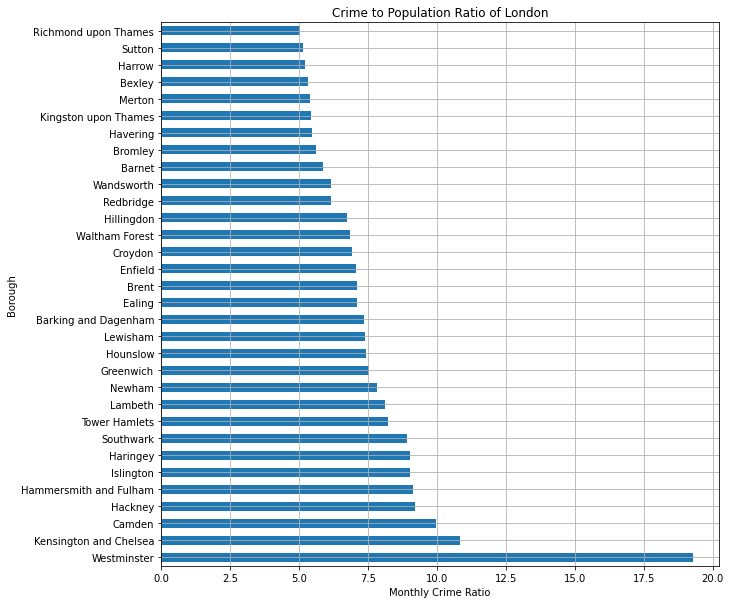

In [26]:
df.set_index('Borough')['Crime Ratio'].sort_values(ascending=False).plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Crime Ratio')
plt.title('Crime to Population Ratio of London')
plt.show()

Since our task was to find out the safest boroughs, we will work further with a new dataframe that will contain top 7 safest boroughs.

In [27]:
df = df.sort_values(by='Crime Ratio')
df_top7 = df.head(7)
df_top7

,Borough,Avg crimes per month,2019 Population,Latitude,Longitude,Crime Ratio
1,Richmond upon Thames,996.041667,198019,51.4406,-0.307639,5.030031
2,Sutton,1064.708333,206349,51.3656,-0.1963,5.159746
4,Harrow,1313.083333,251160,51.5968,-0.337316,5.228075
5,Bexley,1325.916667,248287,51.4416,0.150488,5.340258
3,Merton,1112.791667,206548,51.4109,-0.188097,5.387569
0,Kingston upon Thames,967.833333,177507,51.4096,-0.306262,5.452367
6,Havering,1419.833333,259552,51.5444,-0.144307,5.470323


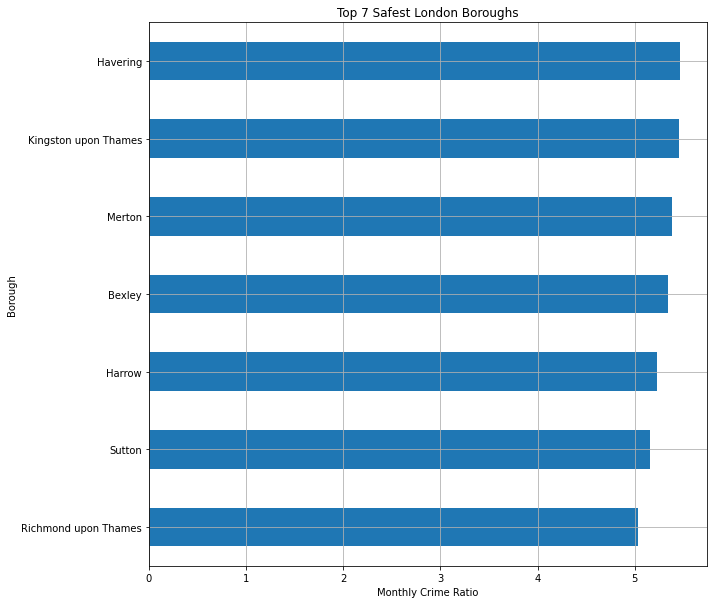

In [28]:
df_top7.set_index('Borough')['Crime Ratio'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Crime Ratio')
plt.title('Top 7 Safest London Boroughs')
plt.show()

Let's check data types of our dataset

In [29]:
df_top7.dtypes

Borough                  object
Avg crimes per month    float64
2019 Population           int64
Latitude                 object
Longitude                object
Crime Ratio             float64
dtype: object

In [30]:
df_top7[["Latitude", "Longitude"]] = df_top7[["Latitude", "Longitude"]].astype("float")
df_top7

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Borough,Avg crimes per month,2019 Population,Latitude,Longitude,Crime Ratio
1,Richmond upon Thames,996.041667,198019,51.440553,-0.307639,5.030031
2,Sutton,1064.708333,206349,51.365600,-0.196300,5.159746
4,Harrow,1313.083333,251160,51.596827,-0.337316,5.228075
5,Bexley,1325.916667,248287,51.441600,0.150488,5.340258
3,Merton,1112.791667,206548,51.410870,-0.188097,5.387569
0,Kingston upon Thames,967.833333,177507,51.409627,-0.306262,5.452367
6,Havering,1419.833333,259552,51.544385,-0.144307,5.470323


In [31]:
df_top7.dtypes

Borough                  object
Avg crimes per month    float64
2019 Population           int64
Latitude                float64
Longitude               float64
Crime Ratio             float64
dtype: object

Let's get coordinates of London and plot our results on map using Folium

In [32]:
address = 'London, UK'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude values of London are {}, {}.'.format(latitude, longitude))

Latitude and longitude values of London are 51.5073219, -0.1276474.


In [33]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top7['Latitude'], df_top7['Longitude'], df_top7['Borough']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

After analysing this map with the top 7 safest boroughs we found out a great opportunity to focus on area covering both Richmond upon Thames and Kingston upon Thames, since they are super close to each other! Lets analyse this area.

In [34]:
rk = df_top7.iloc[[0,5]] 
rk

,Borough,Avg crimes per month,2019 Population,Latitude,Longitude,Crime Ratio
1,Richmond upon Thames,996.041667,198019,51.440553,-0.307639,5.030031
0,Kingston upon Thames,967.833333,177507,51.409627,-0.306262,5.452367


Let's check if combined population and avg crimes still fits into minimal Crime Ratio to total population.

In [36]:
cp = rk.iloc[:,2].sum(axis=0)
cc = rk.iloc[:,1].sum(axis=0)
ccr = cc / cp * 1000
print('Combined Population:', cp)
print('Combined Avg Crime:', cc)
print('Combined Crime Ratio:', ccr)

Combined Population: 375526
Combined Avg Crime: 1963.875
Combined Crime Ratio: 5.229664523894485


### Awesome! With third lowest crime ratio 5.2 Richmond +  Kingston combined area with total 375526 people is our sweet spot!

#### We will further work only with Richmond + Kingston boroughs dataframe: rk

In [37]:
rk

,Borough,Avg crimes per month,2019 Population,Latitude,Longitude,Crime Ratio
1,Richmond upon Thames,996.041667,198019,51.440553,-0.307639,5.030031
0,Kingston upon Thames,967.833333,177507,51.409627,-0.306262,5.452367


Lets get the map with markers only for the region as defined in our new dataframe:

In [38]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(rk['Latitude'], rk['Longitude'], rk['Borough']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

# > End of the 3rd part of the data preparation<

***

# Part 4 - Exploring defined area using Foursquare API

Getting Foursquare Credentials and Version

In [39]:
CLIENT_ID = CLIENT_SECRET = VERSION = '20210301'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CLIENT_SECRET: 

### Lets explore the first neighborhood from our Richmond + Kingston dataframe

In [40]:
rk.loc[0, 'Borough']

'Kingston upon Thames'

#### Ok. Now lets get the latitude and longitude values for Kingston upon Thames

In [41]:
neighborhood_latitude = rk.loc[0, 'Latitude']
neighborhood_longitude = rk.loc[0, 'Longitude']
neighborhood_name = rk.loc[0, 'Borough']
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Kingston upon Thames are 51.4096275, -0.3062621.


#### Now, let's get the top 100 venues that are in Kingston upon Thames within a radius of 500 meters.

In [42]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [43]:
# get the result to a json file
results = requests.get(url).json()
# results

Function that extracts the category of the venue

In [44]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [45]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Kingston Market Place,Market,51.409600,-0.306265
1,Fortunella,Café,51.409257,-0.305709
2,The Ram,Pub,51.408149,-0.307768
3,Rose Theatre,Theater,51.408557,-0.307327
4,Banquet Records,Record Shop,51.409080,-0.303382


And how many venues were returned by Foursquare?

In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Lets explore all venues in our chosen part London (e.i. Richmond + Kingston)

Let's create a function to repeat the same process to all the neighborhoods in Toronto only (from our dataframe df_toronto_only).

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now lets write the code to run the above function on each neighborhood and create a new dataframe toronto_only_venues.

In [48]:
rk_only_venues = getNearbyVenues(names=rk['Borough'],
                                   latitudes=rk['Latitude'],
                                   longitudes=rk['Longitude']
                                  )

In [49]:
rk_only_venues.head(12)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Richmond upon Thames,51.440553,-0.307639,Hansel & Pretzel,51.438519,-0.313489,German Restaurant
1,Richmond upon Thames,51.440553,-0.307639,Sandy Lane,51.440197,-0.303963,Bus Station
2,Richmond upon Thames,51.440553,-0.307639,Palm Centre,51.442467,-0.313922,Garden Center
3,Richmond upon Thames,51.440553,-0.307639,Cut Throat Alley,51.441989,-0.314463,Trail
4,Kingston upon Thames,51.409627,-0.306262,Kingston Market Place,51.409600,-0.306265,Market
5,Kingston upon Thames,51.409627,-0.306262,Fortunella,51.409257,-0.305709,Café
6,Kingston upon Thames,51.409627,-0.306262,The Ram,51.408149,-0.307768,Pub
7,Kingston upon Thames,51.409627,-0.306262,Rose Theatre,51.408557,-0.307327,Theater
8,Kingston upon Thames,51.409627,-0.306262,Banquet Records,51.409080,-0.303382,Record Shop
9,Kingston upon Thames,51.409627,-0.306262,Woody's Bar & Kitchen,51.408436,-0.308465,Pub


Let's check the size of the resulting dataframe

In [50]:
print(rk_only_venues.shape)

(104, 7)


Let's find out the number of unique categories of venues

In [51]:
print('There are {} uniques venue categories.'.format(len(rk_only_venues['Venue Category'].unique())))

There are 61 uniques venue categories.


### Lets analyze each neighborhood

In [52]:
# one hot encoding
rk_onehot = pd.get_dummies(rk_only_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
rk_onehot['Borough'] = rk_only_venues['Borough'] 

# move Borough column to the first column
fixed_columns = [rk_onehot.columns[-1]] + list(rk_onehot.columns[:-1])
rk_onehot = rk_onehot[fixed_columns]

rk_onehot.head()

,Borough,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Burger Joint,Burrito Place,Bus Station,Café,Cajun / Creole Restaurant,Candy Store,Chocolate Shop,Clothing Store,Coffee Shop,Cosmetics Shop,Department Store,Dessert Shop,Donut Shop,Electronics Store,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Garden Center,Gastropub,German Restaurant,Gift Shop,Gym / Fitness Center,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Latin American Restaurant,Lebanese Restaurant,Market,Mexican Restaurant,Pedestrian Plaza,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Record Shop,Restaurant,Sandwich Place,Shopping Mall,Smoothie Shop,Souvlaki Shop,Stationery Store,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store
0,Richmond upon Thames,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Richmond upon Thames,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Richmond upon Thames,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Richmond upon Thames,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Kingston upon Thames,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [53]:
rk_onehot.shape

(104, 62)

Ok, now let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [54]:
rk_grouped = rk_onehot.groupby('Borough').mean().reset_index()
rk_grouped.head(12)

,Borough,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Burger Joint,Burrito Place,Bus Station,Café,Cajun / Creole Restaurant,Candy Store,Chocolate Shop,Clothing Store,Coffee Shop,Cosmetics Shop,Department Store,Dessert Shop,Donut Shop,Electronics Store,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Garden Center,Gastropub,German Restaurant,Gift Shop,Gym / Fitness Center,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Latin American Restaurant,Lebanese Restaurant,Market,Mexican Restaurant,Pedestrian Plaza,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Record Shop,Restaurant,Sandwich Place,Shopping Mall,Smoothie Shop,Souvlaki Shop,Stationery Store,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store
0,Kingston upon Thames,0.01,0.01,0.03,0.01,0.01,0.02,0.02,0.01,0.00,0.06,0.01,0.01,0.01,0.05,0.1,0.01,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.03,0.02,0.01,0.01,0.05,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.01,0.01,0.01,0.03,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.01,0.00,0.01,0.01,0.01
1,Richmond upon Thames,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00


Let's find our the new dataframe size

In [55]:
rk_grouped.shape

(2, 62)

That's cleaner! :)

#### Now lets find out top 10 most common venues in each neighborhood

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = rk_grouped['Borough']

for ind in np.arange(rk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,Coffee Shop,Pub,Café,Italian Restaurant,Clothing Store,Hotel,Bakery,Sushi Restaurant,Department Store,Sandwich Place
1,Richmond upon Thames,Trail,German Restaurant,Garden Center,Bus Station,Video Game Store,Cosmetics Shop,Gift Shop,Gastropub,French Restaurant,Fast Food Restaurant


### There are no Pizza Place in top 10 - so we our client will not crush into competition! That's great!

# Conclusion

This data science project was designed to identify the safest boroughs of London, analyse total population of the safest boroughts and then check the number of Pizza places to avoid harsh competition for a newly established Pizza restaurant and an extra-fast delivery around the selected borough.

Trough our data analysis we discovered a very safe area combining two neighbouring boroughs without a Pizza place in a top ten common venues.

Since our client's intention was to focus on a small local area, and we found that there will be no competition for a newly established Pizza restaurant with extra-fast loacl delivery (i.e. 20 min), luckly we did not nee to apply any clustering methods to provide a quality data science advice to our client.

The decission on optimal Pizza restaurant location will be made by our client after taking into consideration specific traffic and rental characteristics of the selected boroughs.